In [109]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns


In [110]:
#Read the data
#Question: Based on which parameters are the prices of houses in the suburbs of Boston estimated?
data=pd.read_csv('HousingData.csv', delimiter=",")
data
#Last column correspondsto the target variable (y), the median value of each house in 1000's

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [111]:
#Handling NaN values
#Replace the NaN values with the value of the above row through forward filling

data=data.fillna(method='ffill')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,2.94,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,14.33,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

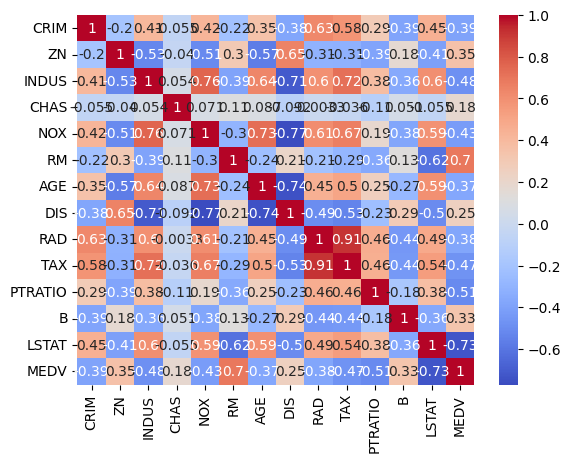

In [112]:
# Inspect data
# compute the correlation matrix: This matrix contains all the correlations between each two variables
#We should also remove the (CHAS) column, becasue its a qualitative variable
corr = data.corr()
# plot the correlation matrix as a heatmap: darker colors=stronger correlation(warm=positive ,cool=negative)
#Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present. 
sns.heatmap(corr, annot=True, cmap='coolwarm')
#We do see multicollinearity between the data , specifically:
#INDUS_DIS,NOX_DIS,AGE_DIS, LSTAT_MEDV and vice versa are highly correlated

In [113]:
#store all features in matrix X amd all target/output variables in vector y.
temp = data.to_numpy()
print(temp.shape)
X = temp[:,:-1] # get features
y = temp[:,-1] # get output values
print(X.shape)


(506, 14)
(506, 13)


In [114]:
#Feature scaling in the X matrix, to scale our data between [-1,1] to avoid creating a model that gives priority to 
#higher numerical values and also avoid the skewness in our data.
#With feature scaling the mean of each of my data is 0 and the standard deviation is 1 .
#We achieve giving our data the typical normal distribution, which is easier to hanlde.
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(X)

In [115]:
# Add X_0 to feature matrix
X_norm = np.column_stack((np.ones((X.shape[0])),X))


In [116]:
#split data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(X_norm,y,test_size=0.1,random_state=0)

#We have splitted our data in 4: 2 matrices and 2 vectors, based on the above defined variables



In [117]:
#Compute the coefficients using the normal equations
from numpy.linalg import inv
# analytically calculate solution
theta = np.matmul(np.matmul(inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
print("Beta: ",theta)


Beta:  [22.53662542 -1.0527575   0.78698712 -0.02476732  0.58987074 -1.82763117
  3.0283276  -0.3572639  -2.85165119  2.33934192 -1.89995473 -2.21539726
  0.90902251 -3.04909797]


In [118]:
# make predictions

y_pred_train=np.dot(X_train,theta)
y_pred_test =np.dot(X_test,theta)
print(y_pred_test)
print(y_pred_train)

[25.23363523 23.59310594 29.20351484 12.22264947 21.69567741 19.14268458
 20.85328382 21.4005365  18.46575167 19.33012298  4.75620374 16.65866583
 17.58280822  5.78529695 39.92359777 32.42233059 22.86662137 36.46577702
 31.08562251 23.17126392 24.94738081 24.02050655 20.62730382 30.21348007
 22.4511945   8.48896605 17.60158485 17.65941752 36.16574675 21.03894608
 18.79072053 18.20933875 19.78570875 23.90982298 28.93544001 19.41390175
 12.05627065 24.29363573 17.58558559 16.21651175 26.46074871 21.21971408
 22.52255119 15.60846191 23.14912327 25.12185052 20.28455744 22.65351066
 10.06305854 24.45968849 20.21858601]
[17.90623828 24.53712134 31.3145481  12.97042431 22.03252533 20.58263565
 15.67785716 12.81485918 22.26366117 17.36000652 21.78988689 33.17076576
 31.41826464 18.1354168  32.40849009 19.52913051 20.19827361 20.45211987
 26.33690226 22.96368975 24.1498763  30.01267848 28.70721289 26.31263542
  5.98469826 37.54961385 24.04503568 27.28190546 19.30371046 28.64867182
 19.19828687 

Residual Standard Error (RSE) for train: 4.5627 on 441 degrees of freedom
R-squared (R2) for training data: 0.7601
Residual Standard Error (RSE) for test: 7.6247 on 37 degrees of freedom
R-squared (R2) for test data: 0.5097



<Axes: xlabel='Actual', ylabel='Predicted'>

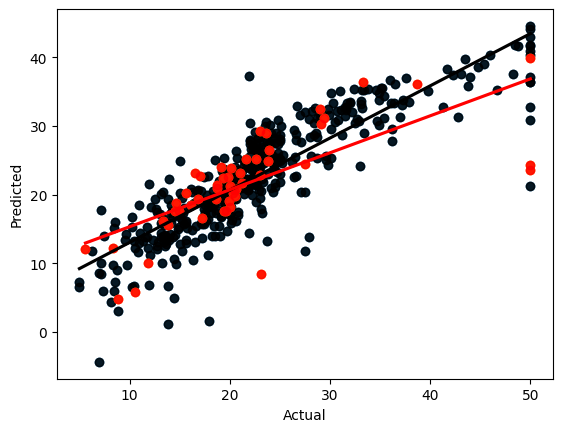

In [130]:
#Evaluate the results

#On training_data
# Calculate the residuals
#(X_train.shape[0]-X_train.shape[1])): degrees of freedom= number of observations (354) minus the 14 model parameters
#estimated from the data  (13 features + the b0 term)
residuals_train = Y_train - y_pred_train
rse_train=np.sqrt(np.sum(residuals_train**2)/(X_train.shape[0]-X_train.shape[1]))

#r_squared
# Calculate the total sum of squares (TSS) for the training data
tss_train = np.sum((Y_train - np.mean(Y_train))**2)
# Calculate the residual sum of squares (RSS) for the training data
rss_train = np.sum((Y_train - y_pred_train)**2)
r_squared_train=1 - (rss_train / tss_train)

print("Residual Standard Error (RSE) for train: {:.4f} on {} degrees of freedom".format(rse_train,X_train.shape[0] - X_train.shape[1]))
print("R-squared (R2) for training data: {:.4f}".format(r_squared_train))
#%%

#On test_data

residuals_test = Y_test - y_pred_test
rse_test=np.sqrt(np.sum(residuals_test**2)/(X_test.shape[0]-X_test.shape[1]))
#r_squared
# Calculate the total sum of squares (TSS) for the training data
tss_test = np.sum((Y_test - np.mean(Y_test))**2)
# Calculate the residual sum of squares (RSS) for the training data
rss_test = np.sum((Y_test - y_pred_test)**2)
r_squared_test=1 - (rss_test / tss_test)


print("Residual Standard Error (RSE) for test: {:.4f} on {} degrees of freedom".format(rse_test, X_test.shape[0] - X_test.shape[1]))
print("R-squared (R2) for test data: {:.4f}".format(r_squared_test))

plt.scatter(Y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=Y_train,y=y_pred_train,ci=None,color ='black')
print()
plt.scatter(Y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=Y_test,y=y_pred_test,ci=None,color ='red')

Considering the above results, we do observe a difference between the produced R-squared and RSE statistics on training and test data. 
R-squared: We observe that the coefficient of determination of the training data showed a higher degree of adaptation compared to the test data. In fact, for the train data: 76% of the variation in the dependent variable (y) is accounted for by the independent variable (X), whereas the same statistic for test data is lowered by 20%, which shows that the line of the test data
cannot adjust, as good as on the train data and that the sum of squared residuals is much more.

RSE: We see a substantial increase in the residual standard error on the test data. This can be the case, because the size of the test data is small compared to the training data.

Considering that we have trained our model on 90% of our entire dataset and we have tested it on the rest 10, we can say that the model Fails to generalize well to new, unseen data, we see the phenomenon of model overfitting.
1. The model is probably fitting to the noise in the training data, which results in lower RSE and a higher r-squared. However, when the same model is applied to the test data, which has a different noise pattern, the RSE increases and r-squared decreases. 
2. Also the distribution of the data can be a reason for overfitting. It's possible that the distribution of the test data is different from the distribution of the training data, which can affect the model's ability to generalize to new, unseen data. 

To check these intuitions and try to improve our model, we can:

1.  Plot the distribution of both the test and train data.
2.  Check for outliers in the data and check for those outliers that may affect my model the most (with Cook's distance)

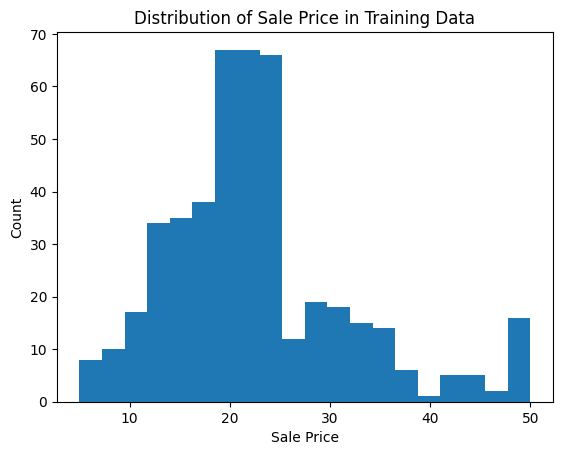

In [120]:
plt.hist(Y_train, bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of Sale Price in Training Data')
plt.show()


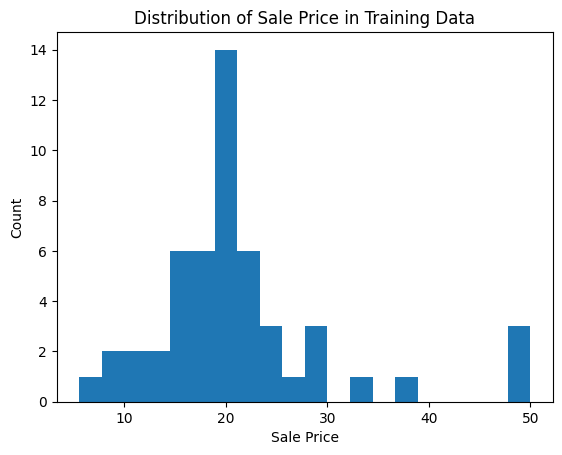

In [121]:
plt.hist(Y_test, bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of Sale Price in Training Data')
plt.show()

#We do not observe a significant difference in the distribution of the test and train data.Their distributions are quite similar.


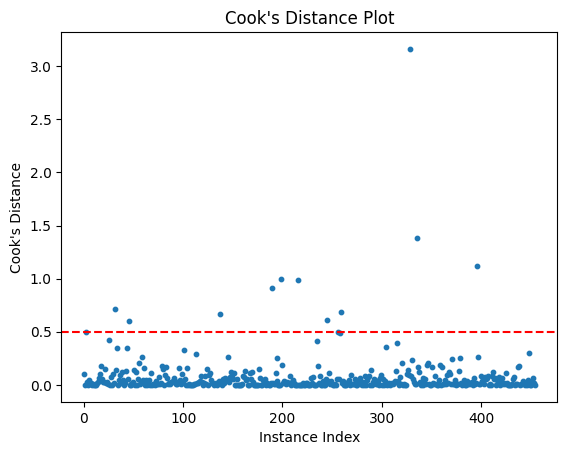

[18.98895731 23.16110936 35.5424215  12.53228708 22.63252738 20.67357352
 16.46458214  7.61527086 21.1431865  17.96209012 22.07772655 33.35801374
 30.83402044 16.07268892 31.18370157 19.63397355 21.33937647 19.66529073
 25.28235139 22.0844455  23.69474878 28.78194829 29.28360885 24.19368811
  5.34698933 38.80928155 24.2701177  26.69365121 18.83296238 28.33380549
 19.57525938 39.55912929 42.02017457 24.41017961 24.07238755 12.71940531
 25.48986895 16.65164215 15.71974217 14.54647326 23.41153957 30.37446282
 20.39777528 20.65765549 24.63339373 15.52517811 17.13206715 26.10629657
 21.83468686 31.54095915 22.32043439 28.605202   23.00623673  5.06138436
 10.50510302 21.4009063  29.34025119 31.0022986  12.09109902 20.78523017
 19.78748716 14.43633424 23.24378141  7.47626224 19.3034451   7.94817069
 44.89000842 30.3123473  12.02211721 17.7228628  21.22445781 22.09450413
 19.61747371 34.89336644 13.99964868 20.324837   35.05585033 19.20261631
 14.88830855 13.81122182 20.78588553 16.34892488 32

<Axes: xlabel='Actual', ylabel='Predicted'>

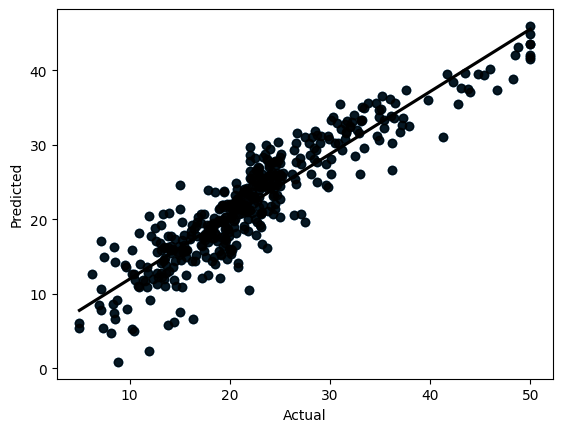

In [127]:
#Cook's distance calculation: to see the effect of each observation in our model.
# Calculate leverage
leverage = np.diag(np.matmul(np.matmul(X_train, np.linalg.inv(np.matmul(X_train.T, X_train))), X_train.T))

# Calculate Cook's distance
mse = np.mean((Y_train - y_pred_train)**2)
cooks_distance = ((y_pred_train - Y_train)**2) / (X_train.shape[1] * mse * (1 - leverage))

plt.scatter(range(len(cooks_distance)), cooks_distance, marker='o', s=10)

# Add horizontal line to indicate threshold for influential observations
plt.axhline(y=0.5, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Instance Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")

# Show the plot
plt.show()

outlier_indices = []
# Loop through each Cook's distance value
for i, cd in enumerate(cooks_distance):
    # If the Cook's distance is above the threshold of 0.5, mark the index as an outlier
    if cd > 0.5:
        outlier_indices.append(i)

# Remove the outliers from the training set
X_train_new = np.delete(X_train, outlier_indices, axis=0)
Y_train_new = np.delete(Y_train, outlier_indices)

# Re-calculate the coefficients using the updated training set
theta_new = np.matmul(np.matmul(inv(np.matmul(X_train_new.T,X_train_new)),X_train_new.T),Y_train_new)
#%%
y_pred_train_new=np.dot(X_train_new,theta_new)
print(y_pred_train_new)

residuals_train = Y_train_new - y_pred_train_new
rse_train=np.sqrt(np.sum(residuals_train**2)/(X_train_new.shape[0]-X_train_new.shape[1]))

#r_squared
# Calculate the total sum of squares (TSS) for the training data
tss_train = np.sum((Y_train_new - np.mean(Y_train_new))**2)
# Calculate the residual sum of squares (RSS) for the training data
rss_train = np.sum((Y_train_new - y_pred_train_new)**2)
r_squared_train=1 - (rss_train / tss_train)

print("Residual Standard Error (RSE) for train: {:.4f}".format(rse_train))
print("R-squared (R2) for training data: {:.4f}".format(r_squared_train))
plt.scatter(Y_train_new,y_pred_train_new)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=Y_train_new,y=y_pred_train_new,ci=None,color ='black')

By simply removing these 11 outliers, which seem to have a high effect on my model, we automatically get a lower RSE and a higher level of adjustment for the train data.

# New train_test ratios
1. 80_20

Beta:  [ 2.24853381e+01 -1.05149432e+00  1.04582685e+00 -9.21252811e-03
  6.40595220e-01 -1.80953686e+00  2.59034154e+00 -1.72466110e-01
 -2.97485858e+00  2.07578215e+00 -1.83851703e+00 -2.24255020e+00
  7.39915980e-01 -3.49693134e+00]
[25.05773143 23.65133534 29.53336408 12.07628211 21.45340471 19.39671387
 20.51208425 21.45095655 19.10868055 19.98611913  4.90791999 16.29598606
 17.07368617  5.58061273 40.11324064 32.49704742 22.39548826 36.7864857
 31.03454362 23.29949058 24.85047752 24.62268125 20.68530596 30.44379194
 22.52923099 10.19266316 17.68654629 18.38626067 35.53770243 20.98912931
 18.2265759  17.7893579  19.82639669 24.00023899 29.11681418 19.54146575
 11.10526861 24.78151811 17.42589728 15.42549612 26.26681716 20.98216943
 22.42702664 15.5319285  23.05877415 25.14874773 20.05753733 23.22950052
 10.20664677 24.35020405 21.21907796 17.61452006 24.57074681 29.94792343
 13.45494308 21.81391997 20.86378168 15.50297601 13.78370962 22.38098145
 17.71067404 21.68186906 32.9604111

<Axes: xlabel='Actual', ylabel='Predicted'>

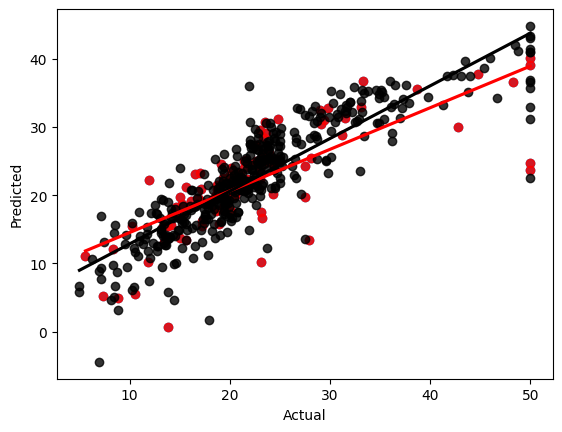

In [132]:
X_train,X_test, Y_train, Y_test=train_test_split(X_norm,y,test_size=0.2,random_state=0)
theta = np.matmul(np.matmul(inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
print("Beta: ",theta)
y_pred_train=np.dot(X_train,theta)
y_pred_test =np.dot(X_test,theta)
print(y_pred_test)
print(y_pred_train)
#RSE
residuals_train = Y_train - y_pred_train
rse_train=np.sqrt(np.sum(residuals_train**2)/(X_train.shape[0]-X_train.shape[1]))
#r_squared
tss_train = np.sum((Y_train - np.mean(Y_train))**2)
rss_train = np.sum((Y_train - y_pred_train)**2)
r_squared_train=1 - (rss_train / tss_train)

print("Residual Standard Error (RSE) for train: {:.4f}".format(rse_train))
print("R-squared (R2) for training data: {:.4f}".format(r_squared_train))
residuals_test = Y_test - y_pred_test
rse_test=np.sqrt(np.sum(residuals_test**2)/(X_test.shape[0]-X_test.shape[1]))
tss_test = np.sum((Y_test - np.mean(Y_test))**2)
rss_test = np.sum((Y_test - y_pred_test)**2)
r_squared_test=1 - (rss_test / tss_test)

print("Residual Standard Error (RSE) for test: {:.4f}".format(rse_test))
print("R-squared (R2) for test data: {:.4f}".format(r_squared_test))

plt.scatter(Y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

sns.regplot(x=Y_test,y=y_pred_test,ci=None,color ='red')
sns.regplot(x=Y_train,y=y_pred_train,ci=None,color ='black')

2. 70_30

Beta:  [ 2.24719026e+01 -1.06963540e+00  1.03406775e+00  1.86497988e-02
  6.96858313e-01 -1.80955695e+00  2.70348925e+00 -3.74247765e-01
 -3.21152632e+00  2.05006339e+00 -1.84755547e+00 -2.18081157e+00
  6.26106449e-01 -3.43870001e+00]
[25.13114238 23.65921771 29.54326418 11.92544265 21.38707323 19.31422504
 20.58012129 21.31339444 19.26358964 20.40446456  5.19396989 16.83307983
 17.15969103  5.38555133 40.35989801 32.32777326 22.38599359 36.44505728
 31.22530396 23.33108056 24.83294182 24.43539036 20.75993655 30.54926847
 22.44452501 10.0977081  17.49227445 18.38745335 35.65368674 20.8616846
 18.19087364 17.72222843 19.19838929 23.56671925 28.96814827 19.77234876
 11.09801995 25.05779166 17.87420465 15.53074722 26.2743204  20.94995118
 22.31076486 15.39353987 22.70968814 24.86622006 19.69362915 23.44924809
 10.0546349  24.4388774  21.72843933 17.91860063 24.44696266 29.9799056
 13.59326044 21.64938704 20.62312951 15.06219682 14.06011296 22.37671465
 17.07129891 21.65116138 33.03279765

<Axes: xlabel='Actual', ylabel='Predicted'>

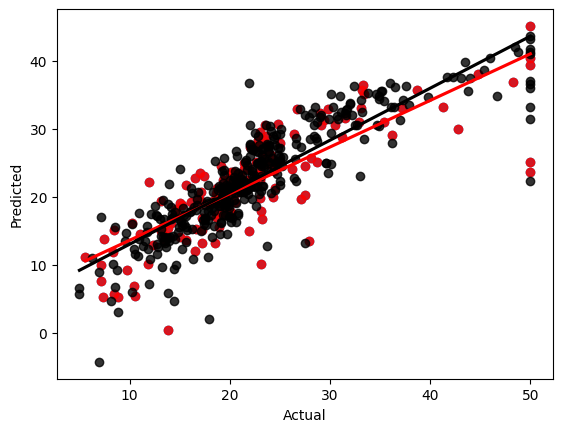

In [133]:
X_train,X_test, Y_train, Y_test=train_test_split(X_norm,y,test_size=0.3,random_state=0)
theta = np.matmul(np.matmul(inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
print("Beta: ",theta)
y_pred_train=np.dot(X_train,theta)
y_pred_test =np.dot(X_test,theta)
print(y_pred_test)
print(y_pred_train)
#RSE
residuals_train = Y_train - y_pred_train
rse_train=np.sqrt(np.sum(residuals_train**2)/(X_train.shape[0]-X_train.shape[1]))
#r_squared
tss_train = np.sum((Y_train - np.mean(Y_train))**2)
rss_train = np.sum((Y_train - y_pred_train)**2)
r_squared_train=1 - (rss_train / tss_train)

print("Residual Standard Error (RSE) for train: {:.4f}".format(rse_train))
print("R-squared (R2) for training data: {:.4f}".format(r_squared_train))
residuals_test = Y_test - y_pred_test
rse_test=np.sqrt(np.sum(residuals_test**2)/(X_test.shape[0]-X_test.shape[1]))
tss_test = np.sum((Y_test - np.mean(Y_test))**2)
rss_test = np.sum((Y_test - y_pred_test)**2)
r_squared_test=1 - (rss_test / tss_test)

print("Residual Standard Error (RSE) for test: {:.4f}".format(rse_test))
print("R-squared (R2) for test data: {:.4f}".format(r_squared_test))

plt.scatter(Y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

sns.regplot(x=Y_test,y=y_pred_test,ci=None,color ='red')
sns.regplot(x=Y_train,y=y_pred_train,ci=None,color ='black')

3. 50_50

Beta:  [22.65876052 -1.07996189  1.36120505  0.39932226  0.99161755 -1.76214867
  2.48796935 -0.24120141 -3.37496306  2.04895559 -1.626261   -2.38795463
  0.6037968  -4.18979749]
[24.97901248 24.89681003 31.19237474 12.28958596 21.23367563 19.18206282
 21.31561483 20.83333075 19.37580471 20.35144305  5.32187221 16.73757501
 17.46176908  5.1080742  43.27130244 32.98853941 23.10190192 37.52071983
 31.37059924 23.13401174 24.67689974 25.6731199  20.39555862 30.94048525
 22.11640693 11.68330784 16.94846135 19.47707261 35.37162679 20.65642387
 18.43791177 18.29163375 18.9504208  23.44213625 29.06150167 21.73287916
 10.55656805 27.62051548 18.13249807 15.15729321 26.51748871 20.17257532
 22.05382062 15.83239599 22.5063141  24.6869192  19.39957061 25.62262082
  9.9544504  24.30433349 23.96003276 17.26522505 24.28087071 29.39729235
 13.90207377 21.29540164 20.53067135 14.20573205 15.38326376 22.98082588
 17.14776437 21.37949264 33.47978852 31.85937572 18.25551877 33.75152889
 18.95246698 18.32

<Axes: xlabel='Actual', ylabel='Predicted'>

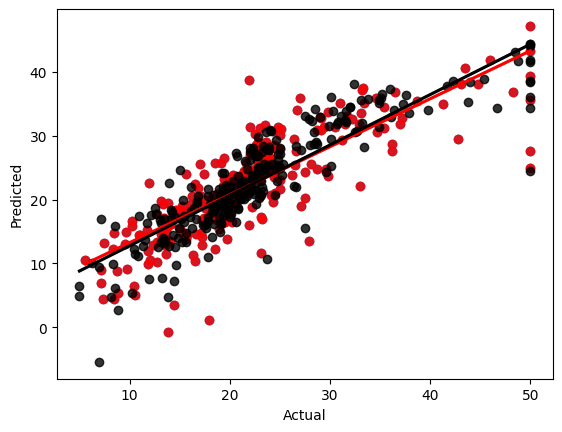

In [147]:
X_train,X_test, Y_train, Y_test=train_test_split(X_norm,y,test_size=0.5,random_state=0)
theta = np.matmul(np.matmul(inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
print("Beta: ",theta)
y_pred_train=np.dot(X_train,theta)
y_pred_test =np.dot(X_test,theta)
print(y_pred_test)
print(y_pred_train)
#RSE
residuals_train = Y_train - y_pred_train
rse_train=np.sqrt(np.sum(residuals_train**2)/(X_train.shape[0]-X_train.shape[1]))
#r_squared
tss_train = np.sum((Y_train - np.mean(Y_train))**2)
rss_train = np.sum((Y_train - y_pred_train)**2)
r_squared_train=1 - (rss_train / tss_train)

print("Residual Standard Error (RSE) for train: {:.4f}".format(rse_train))
print("R-squared (R2) for training data: {:.4f}".format(r_squared_train))
residuals_test = Y_test - y_pred_test
rse_test=np.sqrt(np.sum(residuals_test**2)/(X_test.shape[0]-X_test.shape[1]))
tss_test = np.sum((Y_test - np.mean(Y_test))**2)
rss_test = np.sum((Y_test - y_pred_test)**2)
r_squared_test=1 - (rss_test / tss_test)

print("Residual Standard Error (RSE) for test: {:.4f}".format(rse_test))
print("R-squared (R2) for test data: {:.4f}".format(r_squared_test))


plt.scatter(Y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

sns.regplot(x=Y_test,y=y_pred_test,ci=None,color ='red')
sns.regplot(x=Y_train,y=y_pred_train,ci=None,color ='black')


# Conclusions
The smaller the train_test ratio:
1. the smaller the difference on the residual standard error on train_test data.
2. the higher the accuracy and the level of adjustment of the model on both the train and test data.

From the visualisation of the actual (y) and the predicted values (y-hat) above, we observe that the linear regression line of the test data gradually overlaps with the line of the train data as the train-test ratio reduces.

Further we observe that the RSE decreases on the test data of 50%: this can mean that the model is learning the underlying patterns of the train data and it's not overfitting so it is able to generalize to unseen data better, because it's not mimicing the train data. We also see that the 70_30 and 50_50 ratios produce quite similar resuts ,so we could claim that for this dataset ,a train_test ratio of 70_30 or even better, 75_25 is the right one.

Also we sholuld keep in mind, that there are residuals that are affecting the accuracy of the model,as we indicated above, and their removal from the other train test ratios, will show a higher accuracy of the model.
Lastly, noting the fact of multicollinearity among some variables, we could further consider reducing multicollinearity with 
various strategies: e.g. omitting redundant variables (e.g CHAS).